In [1]:
import os
import zipfile

In [2]:
rock_dir = os.path.join('/home/fabian/dataset/rps/rock')
paper_dir = os.path.join('/home/fabian/dataset/rps/paper')
scissors_dir = os.path.join('/home/fabian/dataset/rps/scissors')

In [3]:
print('Total Training Rock Images: ', len(os.listdir(rock_dir)))
print('Total Training Rock Images: ', len(os.listdir(paper_dir)))
print('Total Training Rock Images: ', len(os.listdir(scissors_dir)))

Total Training Rock Images:  840
Total Training Rock Images:  840
Total Training Rock Images:  840


In [4]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock07-k03-114.png', 'rock03-079.png', 'rock07-k03-084.png', 'rock01-023.png', 'rock02-092.png', 'rock04-109.png', 'rock04-077.png', 'rock05ck01-060.png', 'rock07-k03-105.png', 'rock02-075.png']
['paper01-053.png', 'paper04-018.png', 'paper07-030.png', 'paper04-100.png', 'paper04-016.png', 'paper02-108.png', 'paper01-019.png', 'paper03-104.png', 'paper03-091.png', 'paper02-009.png']
['scissors03-092.png', 'scissors04-014.png', 'scissors03-093.png', 'scissors03-070.png', 'testscissors02-118.png', 'scissors02-030.png', 'scissors02-012.png', 'scissors04-037.png', 'scissors01-009.png', 'scissors03-106.png']


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]

next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

/home/fabian/dataset/rps/rock/rock07-k03-114.png


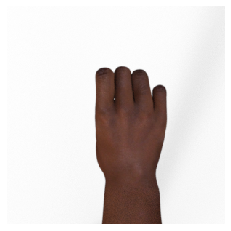

/home/fabian/dataset/rps/rock/rock03-079.png


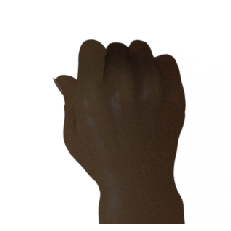

/home/fabian/dataset/rps/paper/paper01-053.png


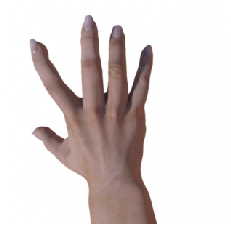

/home/fabian/dataset/rps/paper/paper04-018.png


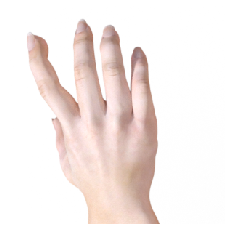

/home/fabian/dataset/rps/scissors/scissors03-092.png


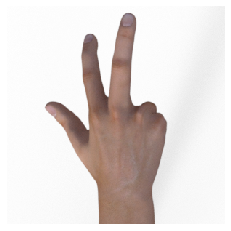

/home/fabian/dataset/rps/scissors/scissors04-014.png


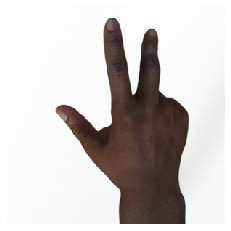

In [7]:
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    print(img_path)
    
    img = mpimg.imread(img_path)
    
    plt.imshow(img)
    plt.axis('Off')
    
    plt.show()

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir = '/home/fabian/dataset/rps/'

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_dir = '/home/fabian/dataset/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale = 1.255)

In [9]:
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [12]:
history = model.fit(train_generator, epochs = 30, steps_per_epoch = 20, validation_data = validation_generator, 
                   verbose = 1, validation_steps = 3)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/30
20/20 [==============================] - 16s 795ms/step - loss: 1.1913 - accuracy: 0.3766 - val_loss: 29.5424 - val_accuracy: 0.3790
Epoch 2/30
20/20 [==============================] - 15s 758ms/step - loss: 0.9862 - accuracy: 0.5000 - val_loss: 46.3480 - val_accuracy: 0.6425
Epoch 3/30
20/20 [==============================] - 15s 739ms/step - loss: 0.8553 - accuracy: 0.5992 - val_loss: 98.1003 - val_accuracy: 0.6559
Epoch 4/30
20/20 [==============================] - 15s 746ms/step - loss: 0.8314 - accuracy: 0.6524 - val_loss: 405.1624 - val_accuracy: 0.6586
Epoch 5/30
20/20 [==============================] - 15s 752ms/step - loss: 0.6034 - accuracy: 0.7500 - val_loss: 134.4192 - val_accuracy: 0.7043
Epoch 6/30
20/20 [==============================] - 15s 741ms/step - loss: 0.5640 - accuracy: 0.7667 - val_loss: 47.7792 - val_accuracy: 0.7930
Epoch 7/30
20/20 [=========================

In [13]:
model.save('rps.h5')

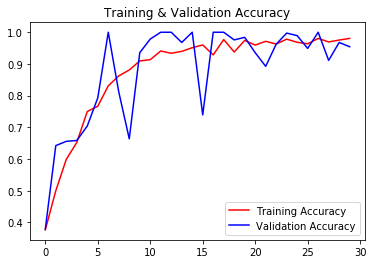

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [16]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image

path = '/home/fabian/images.jpeg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

[[0.0000000e+00 2.0066498e-26 1.0000000e+00]]
